In [10]:
import KAsql2 as ka
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
def get_stars():
    sql = 'SELECT id, business_id, stars FROM ortho.review;' 
    rows = ka.query_SQL(sql)# extracts unique yelp_ids
    df = pd.DataFrame(np.array(rows),columns=['RID','BID','rstars'])
    return df

In [12]:
def make_bid_star_db(star_df):
    # Obtain average Rstar rating (based on scraped reviews) for each doctor (BID)
    star_bus_df = star_df.groupby('BID',axis=0).mean()
    star_bus_df.drop('RID',axis=1, inplace=True)# the average RID has no meaning
    return star_bus_df

In [13]:
def heat_map_data(star_top_df):
    #features = star_top_df.columns[1:]
    topics = star_top_df.iloc[10:16,1:]
    indices = [int(idx) for idx in topics.index]
    topics.index = indices
    topics = topics.apply(lambda x: np.round(x,2))
    return topics

In [21]:
def make_heat_map(topics):
    sns.set_context("talk")
    plt.figure(figsize=(18,3))
    ax = sns.heatmap(topics,cmap="Blues")
    #ax = sns.heatmap(topics,cmap="Blues",annot=True)# put values inside squares

    ax.set_xlabel('Topic Number', fontsize=24)
    ax.set_ylabel('Doctors', fontsize=24)
    plt.setp([ax.get_xticklabels()],visible=False)
    plt.setp([ax.get_yticklabels()],visible=False)
    #ax.set_xticklabels(topics.columns, visible=False)


In [22]:
# TRY A CORRELATION PLOT - STARS BY TOPICS

#sns.corrplot(star_top_df)
#print star_top_df.rstars
#star_array = np.asarray(star_top_df.rstars.tolist()
#feat = star_top_df.corr()

USE ortho;
     RID  BID  rstars
0  20406  303       5
1  20407  303       5
2  20408  303       5
       rstars
BID          
303  4.875000
304  4.941176
305  4.882353


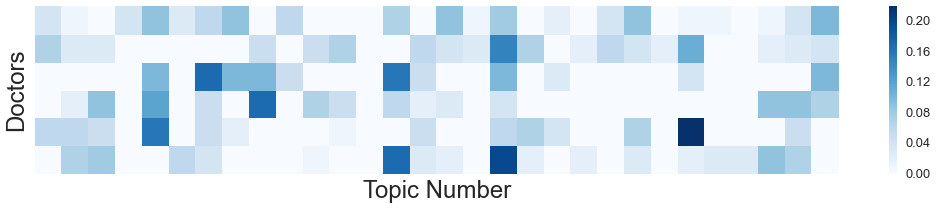

In [23]:
def main():
    """This function will graph a heat map of topics over doctors (BID) and 
    (eventually) examine the correlation between stars and topics
    If I just want the heatmap, I don't strictly need the stars or the merged df"""
    
    # get Rstars from MySQL
    star_df = get_stars()#queries MySQL for data
    print star_df.head(3)#debug
    
    # Average over each doctor, drop RID
    star_bus_df = make_bid_star_db(star_df)
    print star_bus_df.head(3)
    
    # Load BID-topic weight database as pickled DF
    bid_df = pd.read_pickle('bid_tmeans.p')#index of this df is the bid, but can't be indexed by 'BID'
    #print bid_df.head(3)
    #pd.merge(bid_df,star_bus_df,left_on=BID, right_on=BID, how='inner')# doesn't work
    star_top_df = pd.concat([star_bus_df,bid_df],axis=1)
    star_top_df.head(3)
    
    topics = heat_map_data(star_top_df)
    make_heat_map(topics)
    
if __name__=="__main__":
    main()